#Paramere ya da argüman: fonksiyon girdileridir, ve birer değişkendir.

In [ ]:
## argüman ile parametre arasındaki fark nedir?
def add(a,b): ##fonksiyon tanımlanırken ki girdilere parametre(a,b) diyoruz.
    return a+b

##fonks. çağrılırken ki girdilere argüman (x,y) diyoruz 
x,y = 4,5
add(y,x)  ##x, y argüman

In [9]:
def who(first, last="Hoca"):  ##last="Hoca" default değer
    print("Your first name is :", first)
    print("Your last name is :", last)

##fonk. çağıralım
who(first="Guido", last = "van Rossum") #default değer değiştirildi
who(first="Guido") #default değer alındı
who("Guido") 

Your first name is : Guido
Your last name is : van Rossum
Your first name is : Guido
Your last name is : Hoca
Your first name is : Guido
Your last name is : Hoca


Hatırlama: Argümanlar: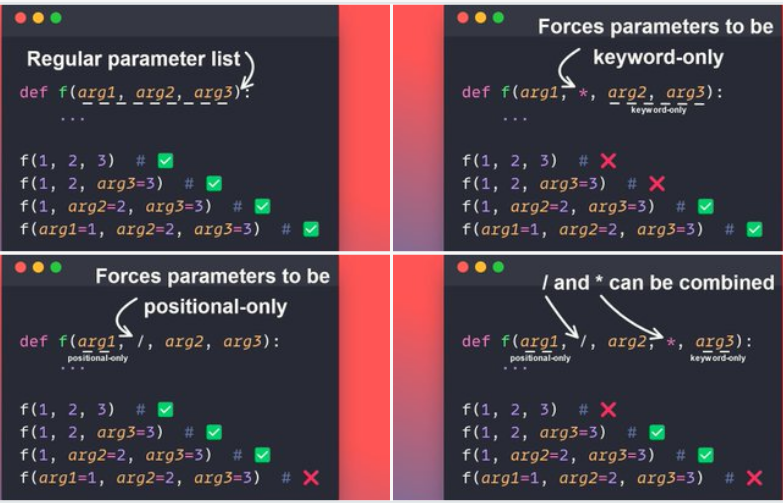

# Recursive Fonksiyonlar ve Scope

In [12]:
#Faktöriyel alma işlemi
#1.çözüm: Döngüsel 
# 5! = 5 * 4 * 3 * 2 * 1
fakt = 1 #yığmalı çarpma işlemi 
for i in range(5,0,-1):
    fakt = fakt*i

#ana program
print("5!=", fakt)


#2.çözüm: Recursive
#5! = 5*4! 
#4! = 4*3!
#3! = 3*2!
#2! = 2*1!
#1! = 1*0!
#0! = 1
def find_fact(n):
    if n==0:
        return 1
    else:
        return n*find_fact(n-1) #fonksiyonu kendi içinde tekrar çağırdım
#ana program
print("5!=",find_fact(5))

5!= 120
5!= 120


**Recursive (Özyinelemeli) Fonksiyonlar**

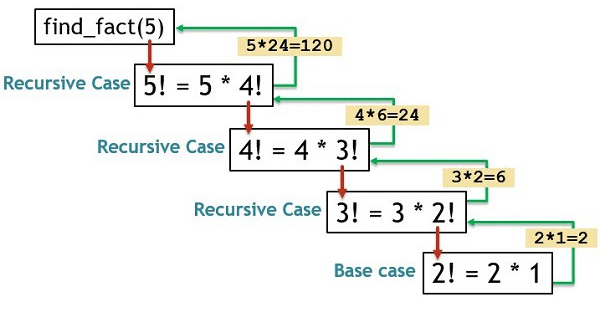

In [13]:
#üs alma işlemi 2^5 = 2*2^4 = 2*(2*2^3) = 2*2* (2*2^2) = 2*2*2*(2*2^1) = 2*2*2*2*(2*2^0) =2*2*2*2*2*1
def iki_us(n):
    if n==0:
        return 1 #bir nokta da sabit değer döndürmem lazım...
    else:
        return 2*iki_us(n-1)
#ana program
print(iki_us(5))


32


In [15]:
#fibonacci
sayi = 55
liste = []
bir = 0
iki = 1
uc = 1
while uc < sayi:
    liste.append(uc)
    uc = bir + iki
    bir, iki = iki, uc
print(liste)

[1, 1, 2, 3, 5, 8, 13, 21, 34]


In [17]:
def fib(n):
    a, b = 0, 1
    while a < n:
        print(a, end=' ')
        a, b = b, a+b
    print()
#ana program
fib(100)

0 1 1 2 3 5 8 13 21 34 55 89 


In [20]:
def fib(n):
    if n==0:
        return 0
    elif n==1:
        return 1
    #recursive fonks.
    else:
        return fib(n-1) + fib(n-2)

#ana program
print(fib(10)) 

55


In [30]:
#sefa beyin çözümü
def fibo(n):
   if n <= 1:
       return n
   else:
       return (fibo(n-1) + fibo(n-2))

#ana program
liste = [fibo(i) for i in range(11)]
liste

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

**NameSpace ve Scope Kavramı**

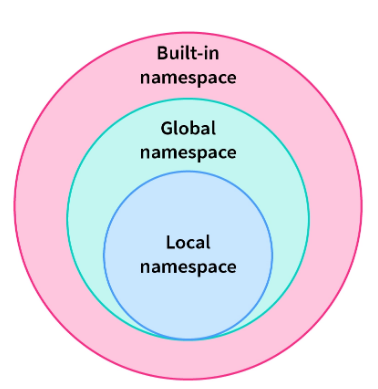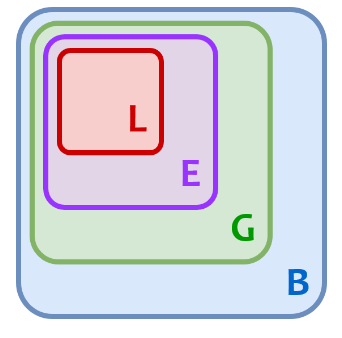

In [31]:
my_var = 'outer variable'   #global my_var ömrü: programın/modülün faaliyet alanı ile sınırlı

def func_var(): 
	my_var = 'inner variable' #local my_var'ın ömrü fonksiyonun faaliyet alanı ile sınırlı
    #scope ları farklı olduğu için tamamen farklı nesneler olarak algılanır
	print(my_var) 

func_var() 
print(my_var)

inner variable
outer variable


In [35]:
my_var = "outer variable" #global değişken programın her yerinde faaliyet gösterir
def my_function():
    print(my_var)

my_function()

outer variable


In [32]:
x = 5
def foo():
    x = x * 2 #globaldekini yerelde doğrudan işleme sokmaya izin vermiyor
    print(x)

foo()

UnboundLocalError: ignored

In [38]:
x = 5
def foo():
    x = 5 # local alanda yeni değer ataması istiyor
    x = x * 2
    print(x)

foo()
print(x) #globaldeki x değeri

10
5


In [43]:
x = 5
def foo():
    y = x * 2 #globaldeki x'i heryerde kullanabiliyoruz
    print(y)

foo()

10


In [41]:
x = 5
def foo():
    y = x * 2 #globaldekini yerelde doğrudan işleme sokmaya izin vermiyor
    print(y)

foo()
print(y)

10


NameError: ignored

In [39]:
x = 5
def foo():
    #global daki x'i kullan
    global x #içerdeki değişiklik globale yansıtılır
    x = x * 2
    print(x)

foo()
print(x) #globaldeki x değeri

10
10


In [40]:
x = 5
print(x) #globaldeki x değeri
def foo():
    #global daki x'i kullan
    global x #içerdeki değişiklik globale yansıtılır
    x = x * 2
    print(x)

foo()


5
10


In [42]:

def foo():
    y = "local değişken"

#global alandayım
foo()
print(y)

NameError: ignored

In [46]:
variable = "global var."
def func_outer():
    variable = "enclosing outer local"
    def func_enclosing1():
        variable = "outer var."
        def func_enclosing2():
            variable = "inner var."
            print("inner..:",variable)
        func_enclosing2()   #func_enclosing1() içerisindeyim
    func_enclosing1()       #func_outer() içerisindeyim

#main program
func_outer()
print("global..:",variable)

inner..: inner var.
global..: global var.


In [47]:
count = 1 # global değişken
def print_global():
    print(count)

print_global()

def counter():
    print(count)
    count += 1 #global count değeri değiştirilmeye çalışıldı!!! UnboundLocalError: 
    #count = count + 1
print()
counter()

1



UnboundLocalError: ignored

In [50]:
count = 1 # global değişken
def print_global():
    print(count)

print_global()

def counter():
    global count
    print(count)
    count += 1 #global count değeri değiştirilmeye çalışıldı!!! UnboundLocalError: 
    #count = count + 1
    print(count)
print()
counter()
print(count)

1

1
2
2


In [52]:
count = 1
def counter():
    global count
    print(count)
    count += 1

counter()
counter()
counter() 
#count değişkenin son değeri 4 olur
print(count)

1
2
3
4


In [ ]:
def func_enclosing1():
    variable = "outer var."
    def func_enclosing2():
        variable = "inner var."
        print("inner..:",variable)
    func_enclosing2()
    print("outer..:", variable)
#ana program    
func_enclosing1()       

In [54]:
def func_enclosing1():
    variable = "outer var."
    def func_enclosing2():
        nonlocal variable
        variable = "inner var."
        print("inner..:",variable)
    func_enclosing2()
    print("outer..:", variable)
#ana program    
func_enclosing1()       

inner..: inner var.
outer..: inner var.


In [56]:
variable = "global"
def func_enclosing1():
    variable = "outer var."
    def func_enclosing2():
        global variable
        variable = "inner var."
        print("inner..:",variable)
    func_enclosing2()
    print("outer..:", variable)
#ana program    
func_enclosing1()
print(variable) 

inner..: inner var.
outer..: outer var.
inner var.


In [57]:
variable = "global"
def func_enclosing1():
    variable = "outer var."
    def func_enclosing2():
        nonlocal variable
        variable = "inner var."
        print("inner..:",variable)
    func_enclosing2()
    print("outer..:", variable)
#ana program    
func_enclosing1()
print(variable) 

inner..: inner var.
outer..: inner var.
global


In [60]:
var = 1
def assigner(a):
    global var
    var = a

assigner('one')
print(var)

one


In [66]:
def func_enclosing1():
    v2 = "outer var."
    def func_enclosing2():
        global v2 #lokaldeki v2 değerini globale taşı
        v2 = "inner var."
        print("inner..:",v2)
    func_enclosing2()
    print("outer..:", v2)

#ana program    
func_enclosing1()
print(v2)

inner..: inner var.
outer..: outer var.
inner var.


In [68]:
def func_enclosing1():
    v3 = "outer var."
    def func_enclosing2():
        nonlocal v3 #lokaldeki v3 değerini bir üst fonks. içerisine taşı
        v3 = "inner var."
        print("inner..:",v3)
    func_enclosing2()
    print("outer..:", v3)

#ana program    
func_enclosing1()
print(v3)

inner..: inner var.
outer..: inner var.


NameError: ignored

In [71]:
def enclosing0():
    v3 = "sıfır"
    def func_enclosing1():
        v3 = "outer var."
        def func_enclosing2():
            nonlocal v3 #lokaldeki v3 değerini hemen bir üst fonks. içerisine taşı
            v3 = "inner var."
            print("inner..:",v3)
        func_enclosing2()
        print("outer..:", v3)
    func_enclosing1()    
    print("en dış fonksiyon..:", v3)
#ana program    
enclosing0()

inner..: inner var.
outer..: inner var.
en dış fonksiyon..: sıfır


In [72]:
def enclosing0():
    v3 = "sıfır"
    def func_enclosing1():
        nonlocal v3
        v3 = "outer var."
        def func_enclosing2():
            nonlocal v3 #lokaldeki v3 değerini hemen bir üst fonks. içerisine taşı
            v3 = "inner var."
            print("inner..:",v3)
        func_enclosing2()
        print("outer..:", v3)
    func_enclosing1()    
    print("en dış fonksiyon..:", v3)
#ana program    
enclosing0()

inner..: inner var.
outer..: inner var.
en dış fonksiyon..: inner var.


In [73]:
my_var = "earth"
def func_var():
    my_var = "universe"
    print(my_var)

print(my_var)

earth


In [74]:
my_var = "earth"
def func_var():
    my_var = "universe"
    print(my_var)


func_var()
print(my_var)

universe
earth


In [75]:
my_var = "earth"
def func_var():
    global my_var
    my_var = "universe"
    print(my_var)


func_var()
print(my_var)

universe
universe


In [76]:
def scope_test():
    def do_local():
        spam = "local spam"

    def do_nonlocal():
        nonlocal spam
        spam = "nonlocal spam"

    def do_global():
        global spam
        spam = "global spam"

    spam = "test spam"
    do_local()
    print("After local assignment:", spam)
    do_nonlocal()
    print("After nonlocal assignment:", spam)
    do_global()
    print("After global assignment:", spam)

scope_test()
print("In global scope:", spam)

After local assignment: test spam
After nonlocal assignment: nonlocal spam
After global assignment: nonlocal spam
In global scope: global spam


In [78]:
def scope_test():
    def do_local():
        spam = "local spam" #local

    def do_nonlocal():
        nonlocal spam
        spam = "nonlocal spam"

    spam = "test spam" #local
    do_local()
    print("After local assignment:", spam)
    do_nonlocal()
    print("After nonlocal assignment:", spam)
   

scope_test()


After local assignment: test spam
After nonlocal assignment: nonlocal spam


In [79]:
x = 10
def my_function_1(): 
    x = 20 
    print(x)
    
print(x)

10


In [82]:
x = 10
  
def my_function():  # fix me!
    global x
    x += 5 
    print(x) 

my_function()

15


In [83]:
il = "Berlin" #global
def city1():
    il = "ankara" #city1 local: enclosing city2
    def city2(): 
        il = "izmit" #city2 local: enclosing city3
        def city3():
            il = "istanbul" #city3 local
            print("city3..:",il)
        city3()
        print("city2..:", il)
        
    city2()
    print("city1..:",il)

#main program: global
city1()
print(il) #global il değeri yazdırıldı

city3..: istanbul
city2..: izmit
city1..: ankara
Berlin


In [84]:
il = "Berlin" #global
def city1():
    il = "ankara" #city1 local: enclosing city2
    def city2(): 
        il = "izmit" #city2 local: enclosing city3
        def city3():
            global il
            il = "istanbul" #city3 local
            print("city3..:",il)
        city3()
        print("city2..:", il)
        
    city2()
    print("city1..:",il)

#main program: global
city1()
print(il) #global il değeri yazdırıldı

city3..: istanbul
city2..: izmit
city1..: ankara
istanbul


In [85]:
il = "Berlin" #global
def city1():
    il = "ankara" #city1 local: enclosing city2
    def city2(): 
        nonlocal il
        il = "izmit" #city2 local: enclosing city3
        def city3():
            global il
            il = "istanbul" #city3 local
            print("city3..:",il)
        city3()
        print("city2..:", il)
        
    city2()
    print("city1..:",il)

#main program: global
city1()
print(il) #global il değeri yazdırıldı

city3..: istanbul
city2..: izmit
city1..: izmit
istanbul


In [86]:
il = "Berlin" #global
def city1():
    #il = "ankara" #city1 local: enclosing city2
    def city2(): 
        nonlocal il
        il = "izmit" #city2 local: enclosing city3
        def city3():
            global il
            il = "istanbul" #city3 local
            print("city3..:",il)
        city3()
        print("city2..:", il)
        
    city2()
    print("city1..:",il)

#main program: global
city1()
print(il) #global il değeri yazdırıldı

SyntaxError: ignored

In [88]:
#il = "Berlin" #global
def city1():
    il1 = "ankara" #city1 local: enclosing city2
    def city2(): 
        nonlocal il1
        il1 = "izmit" #city2 local: enclosing city3
        def city3():
            global il1
            il1 = "istanbul" #city3 local
            print("city3..:",il1)
        city3()
        print("city2..:", il1)
        
    city2()
    print("city1..:",il1)

#main program: global
city1()
print(il1) #global il1 değeri yazdırıldı

city3..: istanbul
city2..: izmit
city1..: izmit
istanbul
